In [22]:
using LinearAlgebra
using Distributions
using Plots
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [23]:
using Newtrinos 

In [24]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    #flavour=Newtrinos.osc.ThreeFlavour(ordering=:IO),
    #flavour = Newtrinos.osc.ADD(three_flavour=Newtrinos.osc.ThreeFlavour(ordering=:IO),N_KK=5),
    #flavour = Newtrinos.osc.UED(three_flavour=Newtrinos.osc.ThreeFlavour(ordering=:IO),N_KK=5),
    #flavour = Newtrinos.osc.UED_BLKT(three_flavour=Newtrinos.osc.ThreeFlavour(ordering=:IO),N_KK=5),
    #flavour = Newtrinos.osc.Sterile(three_flavour=Newtrinos.osc.ThreeFlavour(ordering=:IO)),
    flavour = Newtrinos.osc.UED(three_flavour=Newtrinos.osc.ThreeFlavour(ordering=:IO),N_KK=5),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction = Newtrinos.osc.SI(),
)
osc = Newtrinos.osc.configure(osc_cfg)
physics = (; osc);

In [25]:
experiments = (;
    tao = Newtrinos.tao.configure(physics),
    juno = Newtrinos.juno.configure(physics),
);

[ Info: Loading TAO data
[ Info: Loading juno data


In [26]:
lik = Newtrinos.generate_likelihood(experiments);

In [27]:
p = Newtrinos.get_params(experiments);

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/6KcTF/src/scenes.jl:238


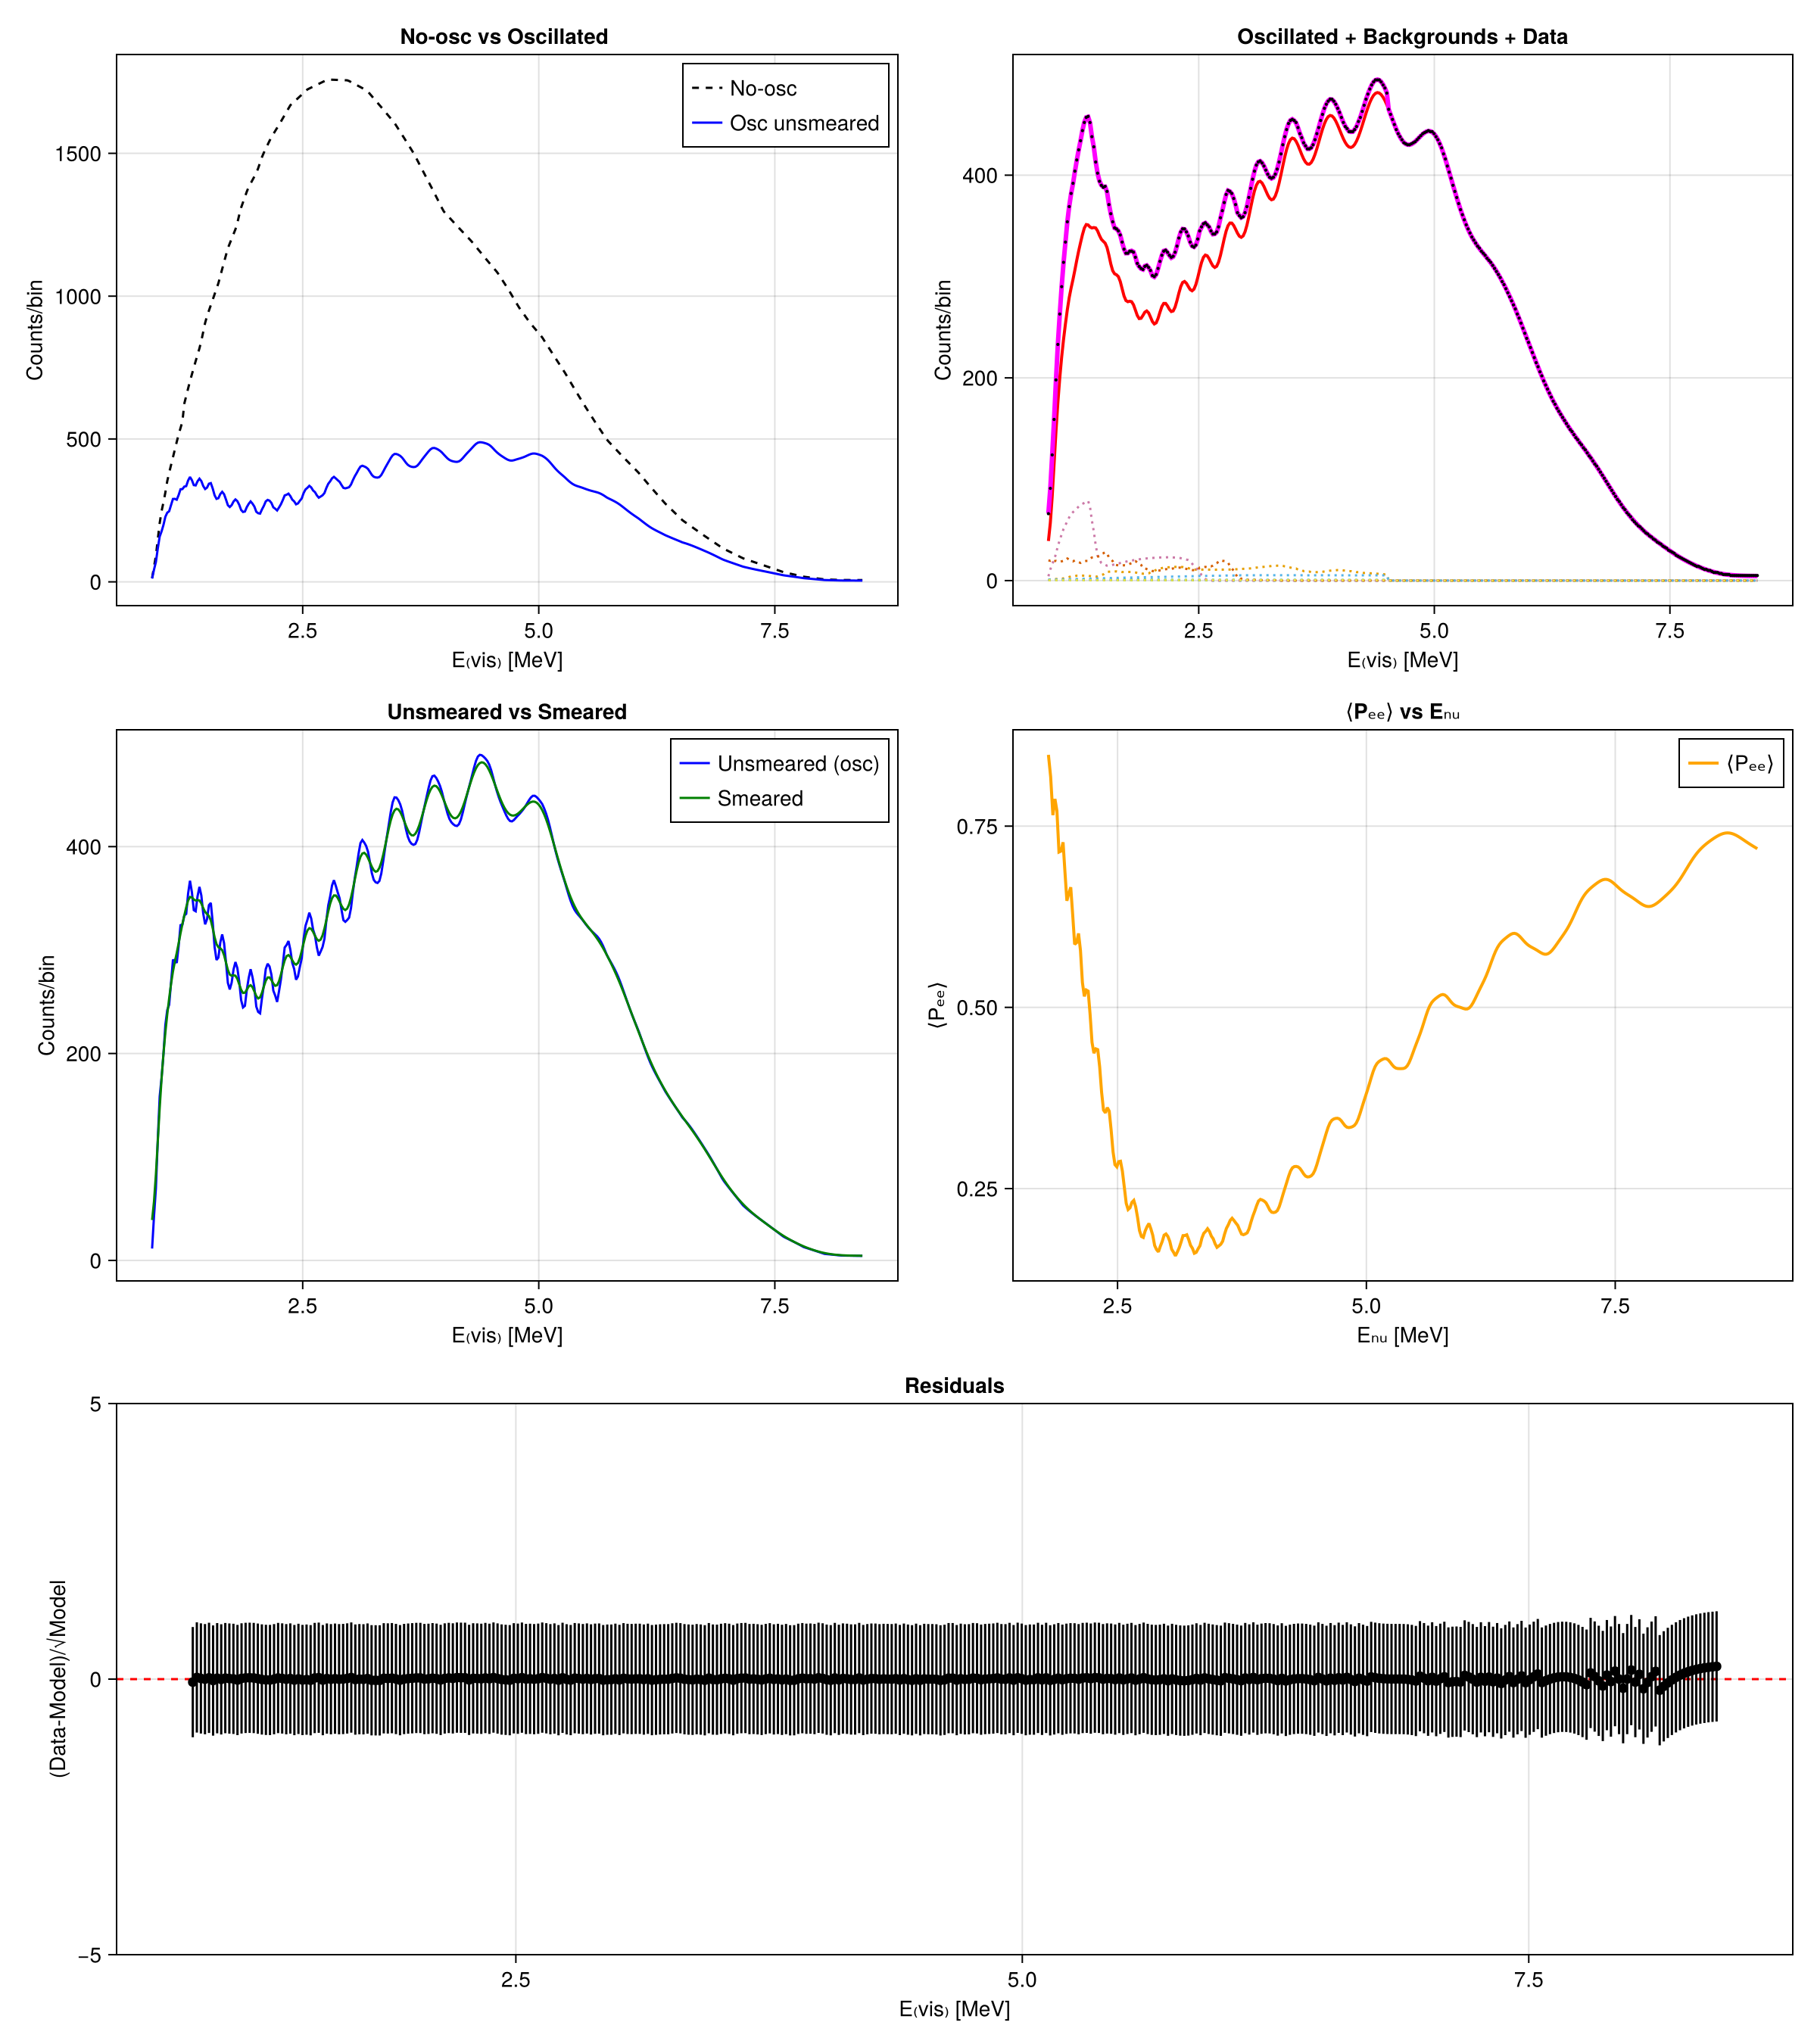

In [28]:
experiments.juno.plot(p)

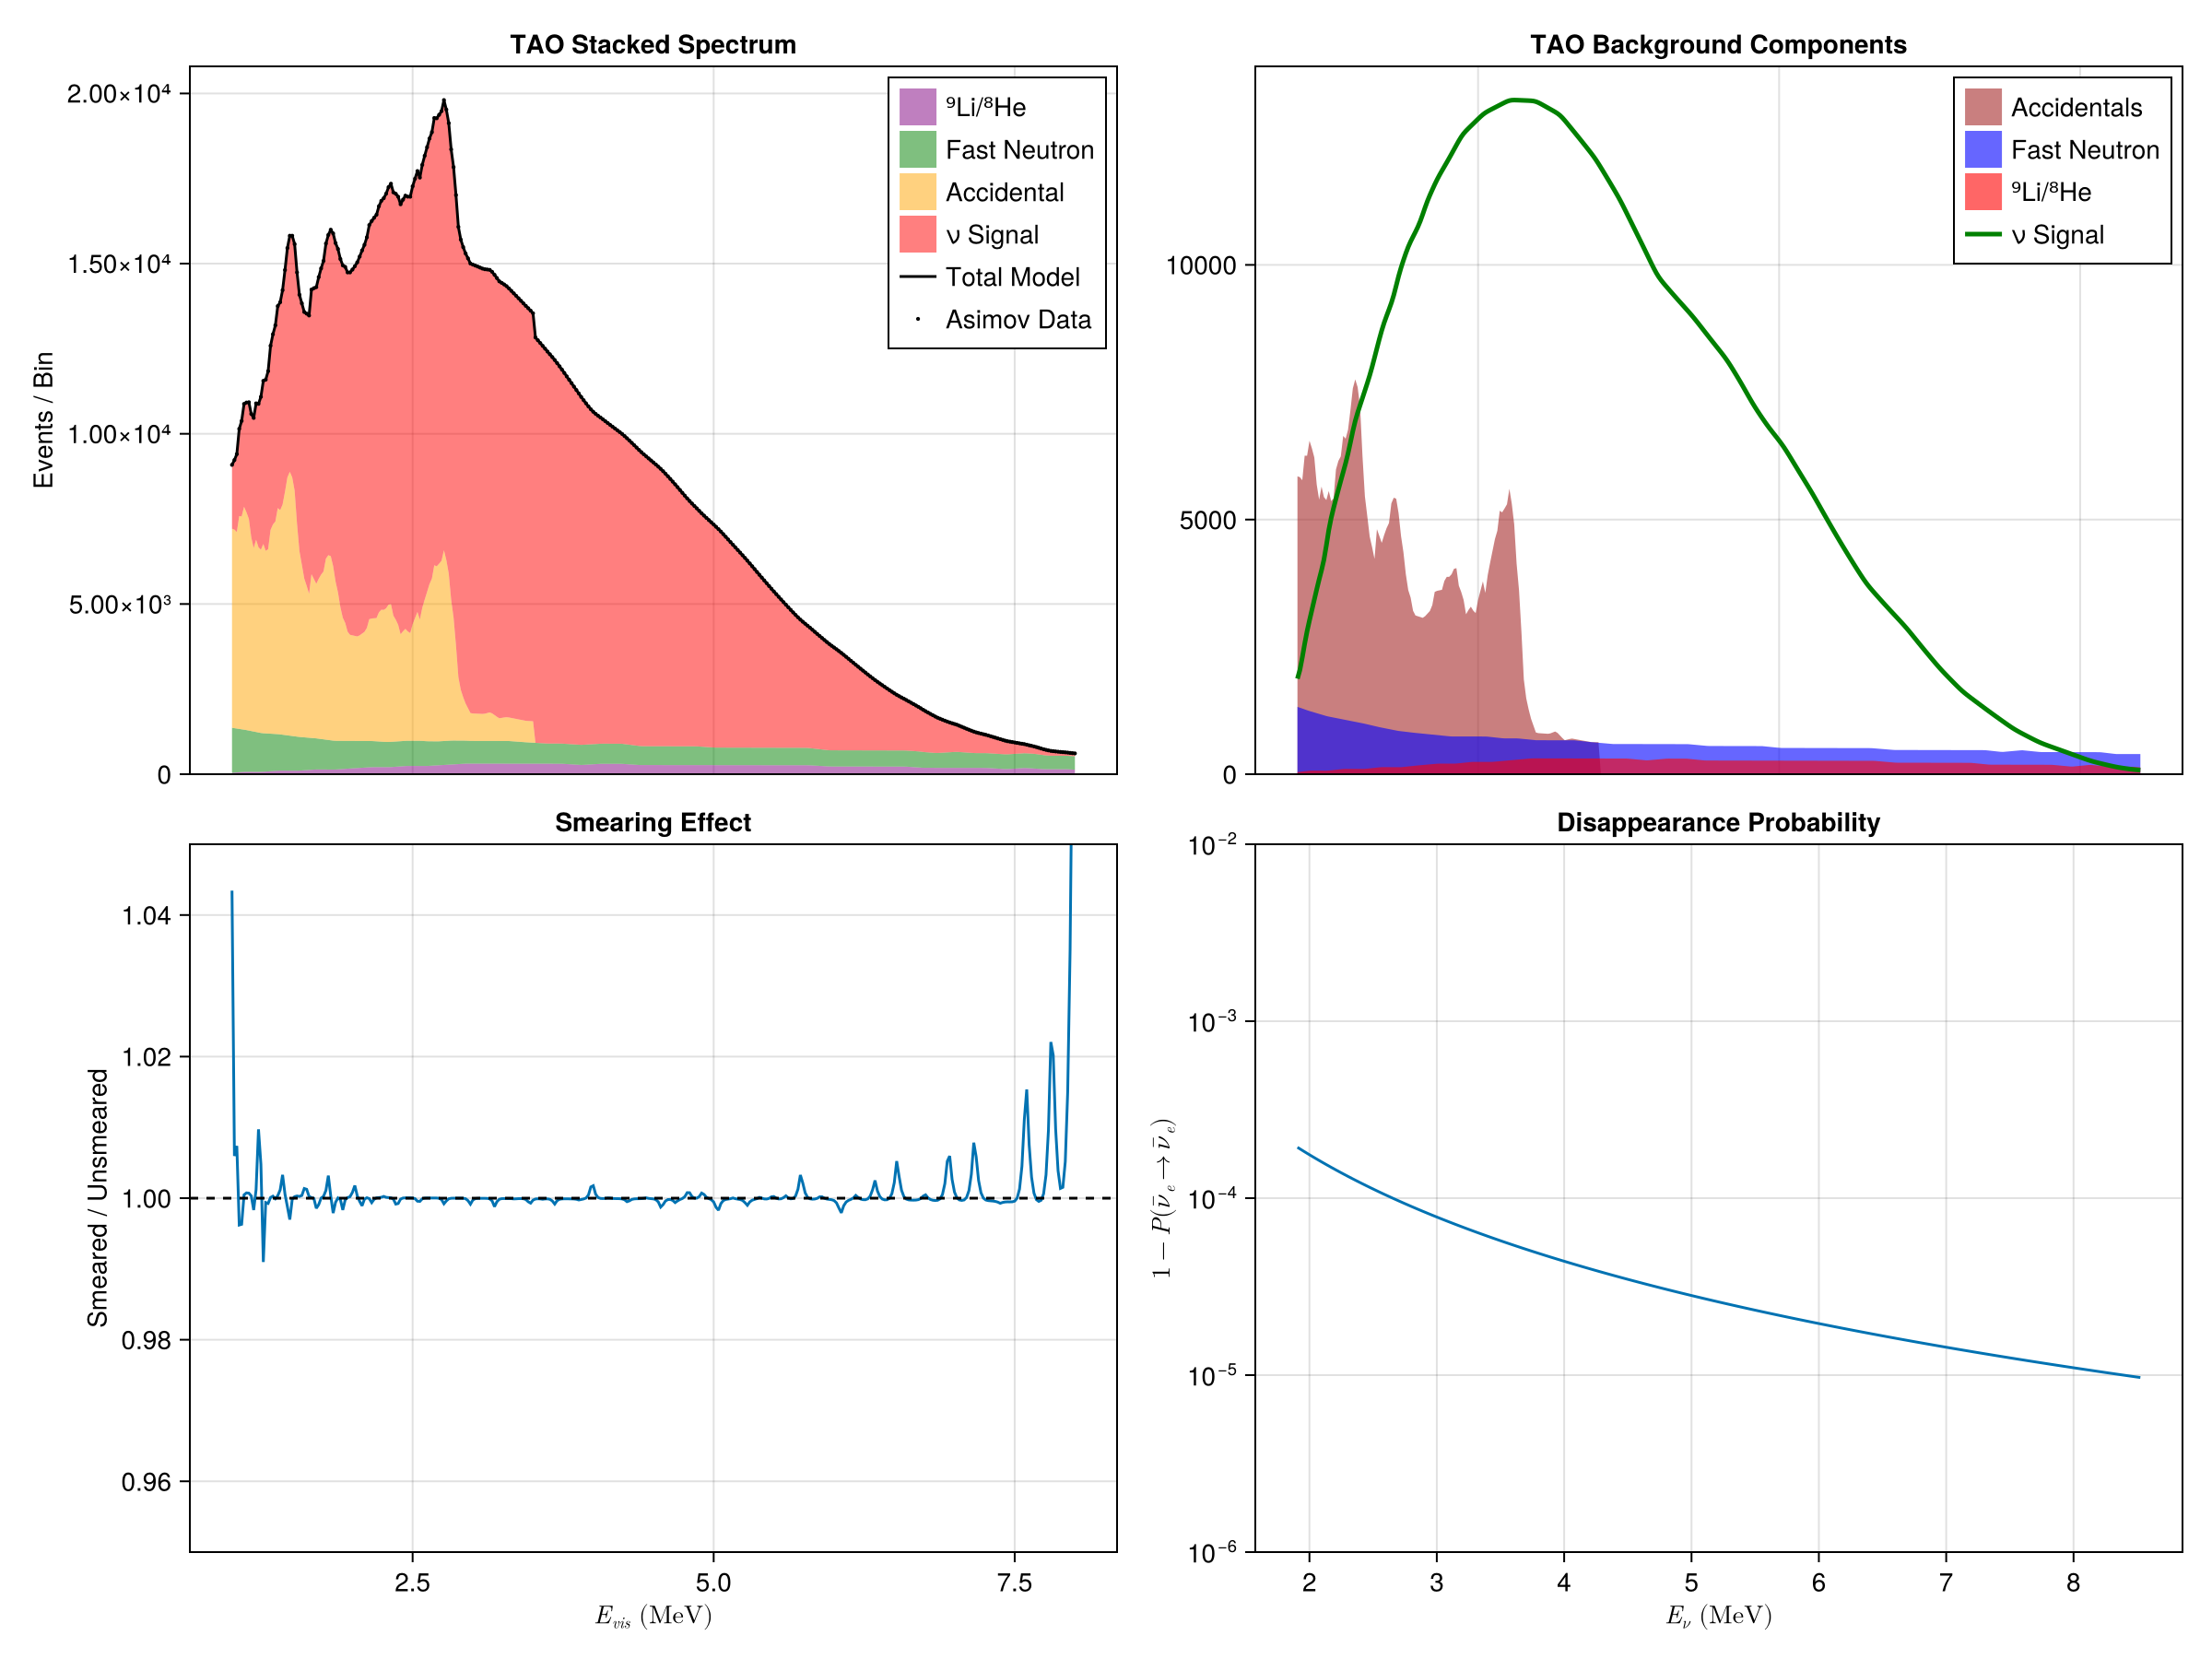

In [29]:
experiments.tao.plot(p)

In [30]:
pri = Newtrinos.get_priors(experiments)
a_juno =  Newtrinos.juno.get_assets(physics);
a_tao =  Newtrinos.tao.get_assets(physics);

[ Info: Loading juno data
[ Info: Loading TAO data
